## NE-FGR for Fulvene

This tutorial will demonstrate how the FGR module can be used for rate calculations

In [1]:
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import models_LVC, units, fgr_py


import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

Get the model Hamiltonian (LVC) parameters

In [2]:
params = models_LVC.get_LVC_set1b()  # parameters are the same as in Xiang Sun code
 
ndof = len(params["omega"])
omega = Py2Cpp_double(params["omega"])
coeff = Py2Cpp_double(params["coup"])
d1 = Py2Cpp_double(params["d1"])
d2 = Py2Cpp_double(params["d2"])

print "ndof = ", ndof

ndof =  30


Convert the bath frequencies to normal modes

In [3]:
U = MATRIX(ndof, ndof)
omega_nm = normal_modes(omega, coeff, U)
#print "U = "; U.show_matrix()
print "omega_nm = ", Cpp2Py(omega_nm)

omega_nm =  [2.9303174361897666e-05, 0.0017302667921885685, 0.002418999999999996, 0.002863400000000002, 0.003354600000000264, 0.0034833000000000012, 0.003685099999999994, 0.003883499999999998, 0.004184199999999997, 0.004382799999999994, 0.004461699999999996, 0.004600199999799155, 0.004813735251331604, 0.005131000000000586, 0.005715626072590603, 0.005756699999584307, 0.005947596551398495, 0.007125172717088626, 0.007212900002625726, 0.007602500000030766, 0.007926999999999264, 0.008244931676685226, 0.008579699999993752, 0.01666899999999996, 0.017017966186652425, 0.017045999999992265, 0.017132190439173498, 0.01717599999993078, 0.017396994021224202, 0.19443523097686655]


Compute the donor-acceptor energy gap - from the about reorganization energies

In this case, we actually as going to use just the provided value

In [4]:
dE = LVC2GOA_dE(params["Delta1"], params["Delta2"], omega_nm, d1, d2)
print "dE = ", dE

dE = params["omega_DA"]
print "dE = ", dE

dE =  -0.132149447238
dE =  0.0989


Now compute the normal modes displacements from the equilibrium values

In [5]:
req_nm = LVC2GOA_req(omega_nm, d1, d2)
print "req_nm = ", Cpp2Py(req_nm)

req_nm =  [0.0, 0.0001341762612223525, 0.0, 0.0, -33.412299036701455, 0.0, 0.0, 0.0, -0.0011082088906290738, 0.0, 0.0, 0.0, -20.91960190385672, -0.00010784679745755161, -14.249558136238011, -0.004394742920197278, 16.03978990159838, 0.00104408111309748, -0.00019109126312166723, -10.596559288669978, -7.708793605789481, 24.332550836666428, -0.0008654790971657386, -8.742671880517127, 1.6381274067315394, 0.00021229247528660905, -0.3320614382174308, 0.00032542076779442476, 0.27788699533924116, -4.061890230540401e-07]


Compute the reorganization energy

In [6]:
print "Omega = ", params["omega"][0]
print "Er(from params) = ", params["Er"]
print "Er(computed) = ", reorganization_energy(omega_nm, req_nm)
y0 = eq_shift(params["Er"], params["omega"][0])
print "y0 = ", y0

Omega =  0.00098662
Er(from params) =  0.0887
Er(computed) =  0.0554905527617
y0 =  213.45036274


Compute the couplings of the bath modes to the primary mode

In [7]:
#gamma_nm = compute_TT_scaled(U, gamma)
gamma_nm = Py2Cpp_double(params["coup"])
print "gamma_nm = ", Cpp2Py(gamma_nm)

gamma_nm =  [0.0, -9.2519e-06, 0.0, 0.0, -2.0893e-10, 0.0, 0.0, 0.0, 0.00043069, 0.0, 0.0, 0.0, -1.0211e-08, 0.00037411, -2.1549e-09, 4.573e-05, 9.7768e-09, 0.00051583, 0.0009486, 3.1798e-08, 1.2354e-08, -2.0903e-09, -0.00035004, -3.9514e-09, 2.0579e-10, 7.0815e-06, -3.3803e-09, -5.233e-05, 1.0461e-08, 3.0324e-06]


Compute the non-equilibrium shifts of all normal modes

In [8]:
s = -1.0     # non-equilibrium parameter

shift_NE = doubleList()
sz = len(req_nm)
for i in xrange(sz):
    shift_NE.append(s * req_nm[i])

print "shift_NE = ", Cpp2Py(shift_NE)

shift_NE =  [-0.0, -0.0001341762612223525, -0.0, -0.0, 33.412299036701455, -0.0, -0.0, -0.0, 0.0011082088906290738, -0.0, -0.0, -0.0, 20.91960190385672, 0.00010784679745755161, 14.249558136238011, 0.004394742920197278, -16.03978990159838, -0.00104408111309748, 0.00019109126312166723, 10.596559288669978, 7.708793605789481, -24.332550836666428, 0.0008654790971657386, 8.742671880517127, -1.6381274067315394, -0.00021229247528660905, 0.3320614382174308, -0.00032542076779442476, -0.27788699533924116, 4.061890230540401e-07]


Setup the donor-acceptor coupling magnitude

In [9]:
gamma = 1.0   # DA_coupling

#V = coupling_Condon(gamma, dE, params["Er"], y0)
#print "V = ", V
V = gamma
print V

1.0


Print out the parameters we have so far

In [10]:
print "================================ Model parameters =========================="
print "Mode index    Mode frequency  Mode coupling   Eq. reorganization    NE shift"

sz = len(req_nm)
for i in xrange(sz):
    print "   %3i            %8.5f     %8.5f       %8.5f             %8.5f" \
    % (i, omega_nm[i], gamma_nm[i], req_nm[i], shift_NE[i])

================================ Model parameters ==========================
Mode index    Mode frequency  Mode coupling   Eq. reorganization    NE shift
     0             0.00003      0.00000        0.00000             -0.00000
     1             0.00173     -0.00001        0.00013             -0.00013
     2             0.00242      0.00000        0.00000             -0.00000
     3             0.00286      0.00000        0.00000             -0.00000
     4             0.00335     -0.00000       -33.41230             33.41230
     5             0.00348      0.00000        0.00000             -0.00000
     6             0.00369      0.00000        0.00000             -0.00000
     7             0.00388      0.00000        0.00000             -0.00000
     8             0.00418      0.00043       -0.00111              0.00111
     9             0.00438      0.00000        0.00000             -0.00000
    10             0.00446      0.00000        0.00000             -0.00000
    11   

### Do convergence test

In [11]:
sim_params = {"dt":0.1*units.fs2au, "dtau":0.02*units.fs2au, "tmax":10.0*units.fs2au,
               "Temperature":300.0, "do_output":False, "dyn_type":0, "method":0        
              }
time0, rate0, pop0 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params)


sim_params.update( {"dt":0.1*units.fs2au, "dtau":0.01*units.fs2au } )
time1, rate1, pop1 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params)

sim_params.update( {"dt":0.1*units.fs2au, "dtau":0.005*units.fs2au } )
time2, rate2, pop2 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params)


sim_params.update( {"dt":0.02*units.fs2au, "dtau":0.005*units.fs2au } )
time3, rate3, pop3 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params)

sim_params.update( {"dt":0.005*units.fs2au, "dtau":0.005*units.fs2au } )
time4, rate4, pop4 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params)

sim_params.update( {"dt":0.001*units.fs2au, "dtau":0.001*units.fs2au } )
time5, rate5, pop5 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params)

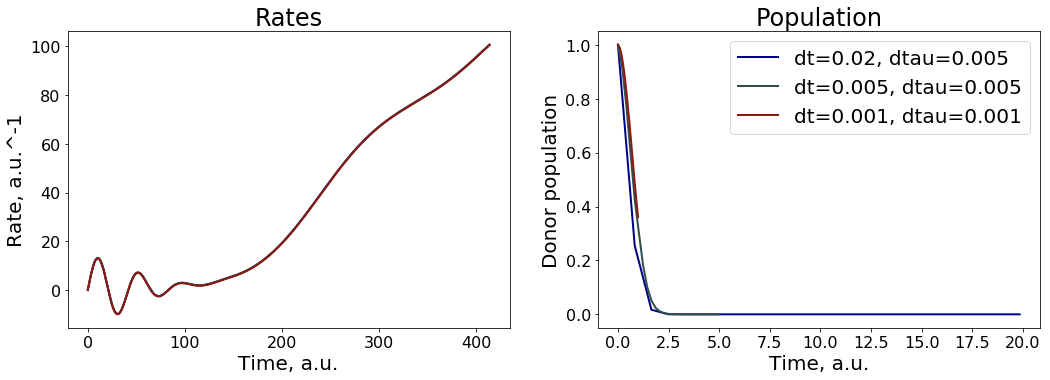

In [12]:
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(2,2,1)
plt.title('Rates')
plt.xlabel('Time, a.u.')
plt.ylabel('Rate, a.u.^-1')
#plt.plot(time0, rate0, label='dt=0.1, dtau=0.02', linewidth=2, color = colors["11"]) 
#plt.plot(time1, rate1, label='dt=0.1, dtau=0.01', linewidth=2, color = colors["21"]) 
#plt.plot(time2, rate2, label='dt=0.1, dtau=0.005', linewidth=2, color = colors["31"]) 
plt.plot(time3, rate3, label='dt=0.02, dtau=0.005', linewidth=2, color = colors["32"]) 
plt.plot(time4, rate4, label='dt=0.005, dtau=0.005', linewidth=2, color = colors["41"]) 
plt.plot(time5, rate5, label='dt=0.001, dtau=0.001', linewidth=2, color = colors["11"]) 
#plt.legend()

plt.subplot(2,2,2)
plt.title('Population')
plt.xlabel('Time, a.u.')
plt.ylabel('Donor population')

N = len(time0)
xmin, xmax = 0, N/4

#plt.plot(time0[xmin:xmax], pop0[xmin:xmax], label='dt=0.1, dtau=0.02', linewidth=2, color = colors["11"]) 
#plt.plot(time1[xmin:xmax], pop1[xmin:xmax], label='dt=0.1, dtau=0.01', linewidth=2, color = colors["21"]) 
#plt.plot(time2[xmin:xmax], pop2[xmin:xmax], label='dt=0.1, dtau=0.005', linewidth=2, color = colors["31"]) 
plt.plot(time3[xmin:xmax], pop3[xmin:xmax], label='dt=0.02, dtau=0.005', linewidth=2, color = colors["32"]) 
plt.plot(time4[xmin:xmax], pop4[xmin:xmax], label='dt=0.005, dtau=0.005', linewidth=2, color = colors["41"]) 
plt.plot(time5[xmin:xmax], pop5[xmin:xmax], label='dt=0.001, dtau=0.001', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()

In [13]:
sim_params = {"dt":0.005*units.fs2au, "dtau":0.005*units.fs2au, "tmax":10.0*units.fs2au,
              "Temperature":300.0, "do_output":False, "dyn_type":0              
             }

Lets do the calculations for various methods

In [14]:
sim_params["method"] = 0
time0, rate0, pop0 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params )

In [15]:
sim_params["method"] = 1
time1, rate1, pop1 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params )

In [16]:
sim_params["method"] = 2
time2, rate2, pop2 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params )

In [17]:
sim_params["method"] = 3
time3, rate3, pop3 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params )

In [18]:
sim_params["method"] = 4
time4, rate4, pop4 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params )

In [19]:
sim_params["method"] = 5
time5, rate5, pop5 = fgr_py.run_NEFGRL_populations(dE, V, omega_nm, gamma_nm,req_nm, shift_NE, sim_params )

And, finally, print out the time-dependent rates as well as the populations as function of time

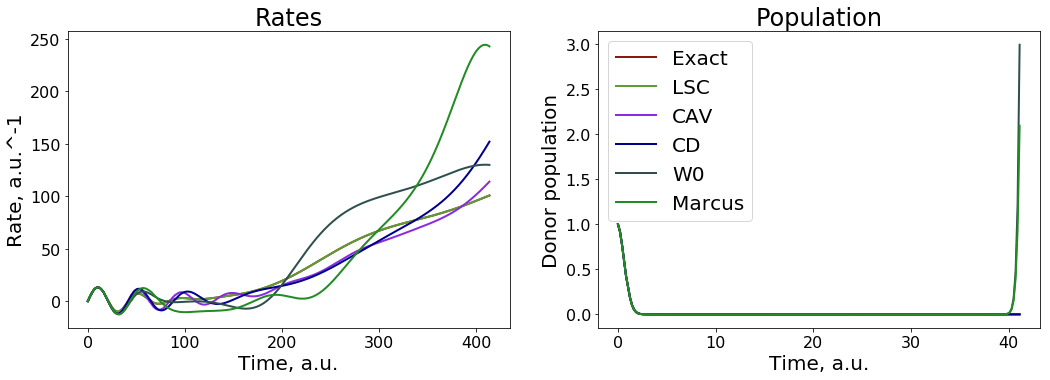

In [20]:
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(2,2,1)
plt.title('Rates')
plt.xlabel('Time, a.u.')
plt.ylabel('Rate, a.u.^-1')
plt.plot(time0, rate0, label='Exact', linewidth=2, color = colors["11"]) 
plt.plot(time1, rate1, label='LSC', linewidth=2, color = colors["21"]) 
plt.plot(time2, rate2, label='CAV', linewidth=2, color = colors["31"]) 
plt.plot(time3, rate3, label='CD', linewidth=2, color = colors["32"]) 
plt.plot(time4, rate4, label='W0', linewidth=2, color = colors["41"]) 
plt.plot(time5, rate5, label='Marcus', linewidth=2, color = colors["23"]) 
#plt.legend()

plt.subplot(2,2,2)
plt.title('Population')
plt.xlabel('Time, a.u.')
plt.ylabel('Donor population')

N = len(time0)
xmin, xmax = 0, N/10

plt.plot(time0[xmin:xmax], pop0[xmin:xmax], label='Exact', linewidth=2, color = colors["11"]) 
plt.plot(time1[xmin:xmax], pop1[xmin:xmax], label='LSC', linewidth=2, color = colors["21"]) 
plt.plot(time2[xmin:xmax], pop2[xmin:xmax], label='CAV', linewidth=2, color = colors["31"]) 
plt.plot(time3[xmin:xmax], pop3[xmin:xmax], label='CD', linewidth=2, color = colors["32"]) 
plt.plot(time4[xmin:xmax], pop4[xmin:xmax], label='W0', linewidth=2, color = colors["41"]) 
plt.plot(time5[xmin:xmax], pop5[xmin:xmax], label='Marcus', linewidth=2, color = colors["23"]) 
plt.legend()

plt.show()
plt.close()